MAHOTAS

In [18]:
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt

# Use your image path here
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_8bb1d9de.jpg"


In [19]:

# Load the image using Mahotas and convert to grayscale manually
image_mahotas = mh.imread(image_path)
if image_mahotas.ndim == 3:
    image_mahotas = (0.2989 * image_mahotas[:, :, 0] +
                     0.5870 * image_mahotas[:, :, 1] +
                     0.1140 * image_mahotas[:, :, 2]).astype(np.uint8)

# Convert the grayscale image to integer type for morphological operations
image_mahotas_int = image_mahotas.astype(np.uint8)

# 1. Image Enhancement (Gaussian Filter using Mahotas)
gaussian_filtered_image_mahotas = mh.gaussian_filter(image_mahotas, 2)

# 2. Noise Removal (Median Filter using Mahotas)
structuring_element = np.ones((3, 3))
median_filtered_image_mahotas = mh.median_filter(image_mahotas_int, Bc=structuring_element)

# 3. Edge Detection (Sobel using Mahotas)
edges_mahotas = mh.sobel(image_mahotas)

# 4. Morphological Operations (Opening and Closing using Mahotas)
opened_image_mahotas = mh.open(image_mahotas_int, np.ones((3, 3)))
closed_image_mahotas = mh.close(image_mahotas_int, np.ones((3, 3)))


In [20]:

# 5. Thresholding to create a binary image
threshold_value = 128
binary_image = closed_image_mahotas > threshold_value

# 6. Label connected components
labeled_image, num_objects = mh.label(binary_image)


Text(0.5, 1.0, 'Median Filtered')

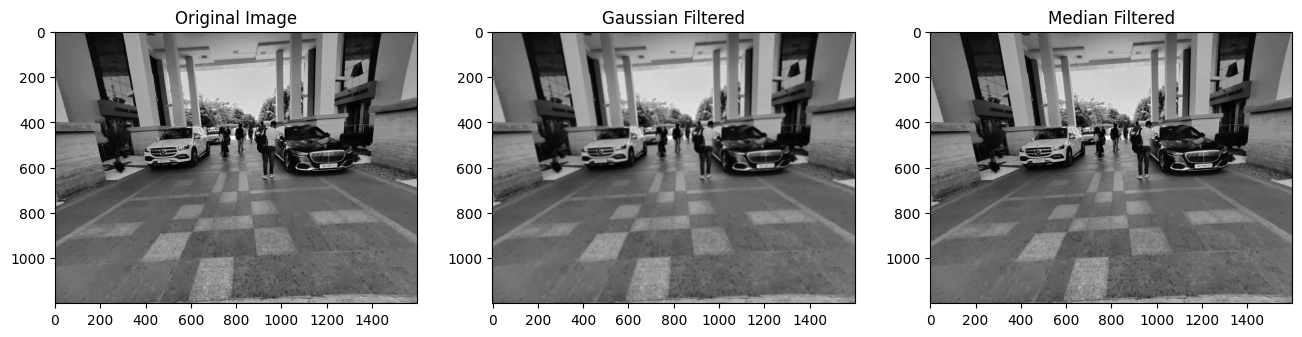

In [21]:

# Display images and object count using Matplotlib
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.imshow(image_mahotas, cmap='gray')
plt.title('Original Image')

plt.subplot(3, 3, 2)
plt.imshow(gaussian_filtered_image_mahotas, cmap='gray')
plt.title('Gaussian Filtered')

plt.subplot(3, 3, 3)
plt.imshow(median_filtered_image_mahotas, cmap='gray')
plt.title('Median Filtered')


Text(0.5, 1.0, 'Morphological Closing')

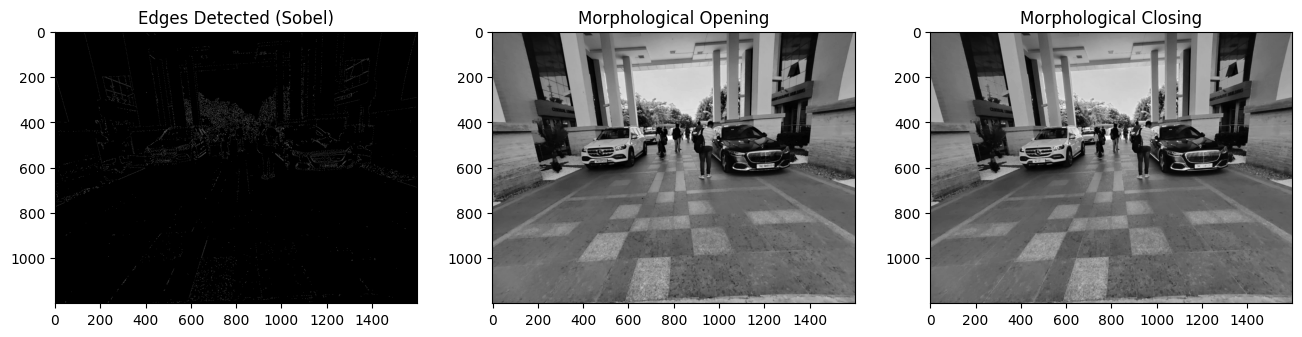

In [22]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 4)
plt.imshow(edges_mahotas, cmap='gray')
plt.title('Edges Detected (Sobel)')

plt.subplot(3, 3, 5)
plt.imshow(opened_image_mahotas, cmap='gray')
plt.title('Morphological Opening')

plt.subplot(3, 3, 6)
plt.imshow(closed_image_mahotas, cmap='gray')
plt.title('Morphological Closing')


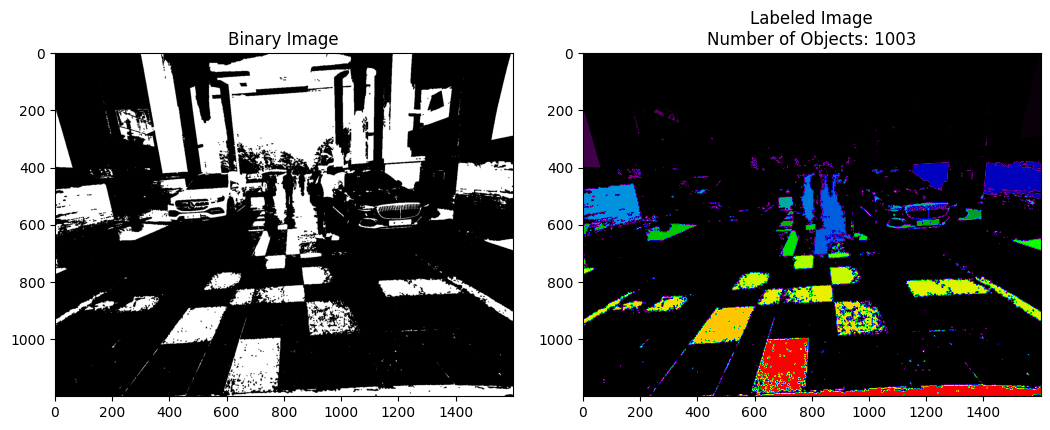

In [23]:
plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 7)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

plt.subplot(3, 3, 8)
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title(f'Labeled Image\nNumber of Objects: {num_objects}')

plt.tight_layout()
plt.show()
